This notebook is for the Most popular category task from the google play store apps. 
"What is the most popular category that has the largest number of installs."

My thanks to:
* Lavanya Gupta for the dataset: https://www.kaggle.com/lava18/google-play-store-apps
* Tinotenda Mhlanga for creating the task: https://www.kaggle.com/lava18/google-play-store-apps/tasks?taskId=276

as one side note: I'm trying to do one Kaggle task a week (this would be my second week) if there is anything i could do to improve the format I'd appriciate any constructive feedback. You can message me directly or comment on the notebook itself.

The numbers used for this graphic are aproximations based on availible data. The dataset isn't precice when it comes to number of downloads so I got a bit creative to reach my solution. I'd love to hear your opinions on my solution down bellow. Did you agree with my aproximation or do you have a better idea?

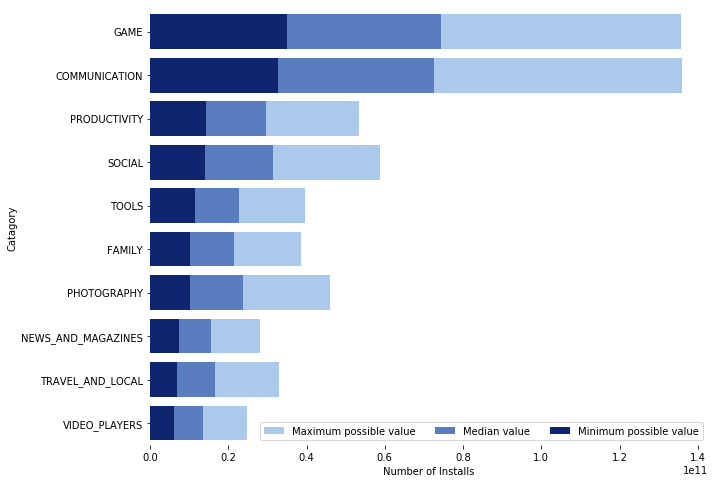

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
app_dat = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')
app_dat.head()
## Notice how the installs column does not have an integer value

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
##Probably should have seen this mistake coming, gave me a good laugh
##essentially this just adds all the strings from "Installs" into one large superstring for each catagory

agg_df = app_dat.groupby(['Category'])['Installs'].sum()
display(agg_df)


Category
1.9                                                                 Free
ART_AND_DESIGN         10,000+500,000+5,000,000+50,000,000+100,000+50...
AUTO_AND_VEHICLES      100,000+1,000,000+100,000+1,000,000+100,000+10...
BEAUTY                 500,000+1,000,000+100,000+500,000+1,000,000+50...
BOOKS_AND_REFERENCE    100,000,000+50,000+100,000+10,000,000+100,000,...
BUSINESS               10,000,000+50,000,000+10,000,000+5,000,000+1,0...
COMICS                 10,000,000+500,000+1,000,000+500,000+50,000+50...
COMMUNICATION          1,000,000,000+1,000,000,000+10,000,000+1,000,0...
DATING                 10,000+1,000+50+100+100+100+10,000,000+10,000,...
EDUCATION              100,000,000+10,000,000+100,000+5,000,000+10,00...
ENTERTAINMENT          100,000,000+1,000,000+1,000,000+10,000,000+50,...
EVENTS                 100,000+5,000,000+500,000+50,000+5,000,000+1,0...
FAMILY                 50,000,000+10,000,000+100,000,000+1,000,000+5,...
FINANCE                10,000,000+1,000,00

In [4]:
#now to see exactly what string values are in the 'Installs' catagory
app_dat.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [5]:
app_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
app_dat.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
over_list = ['1,000,000,000+', '500,000,000+', '100,000,000+', '50,000,000+', '10,000,000+', '5,000,000+', '1,000,000+', '500,000+', '100,000+', '50,000+', '10,000+', '5,000+', '1,000+', '500+', '100+', '50+', '10+', '5+', '1+', '0+', '0']
#this list orders the bins for easier graphing             

In [8]:
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot

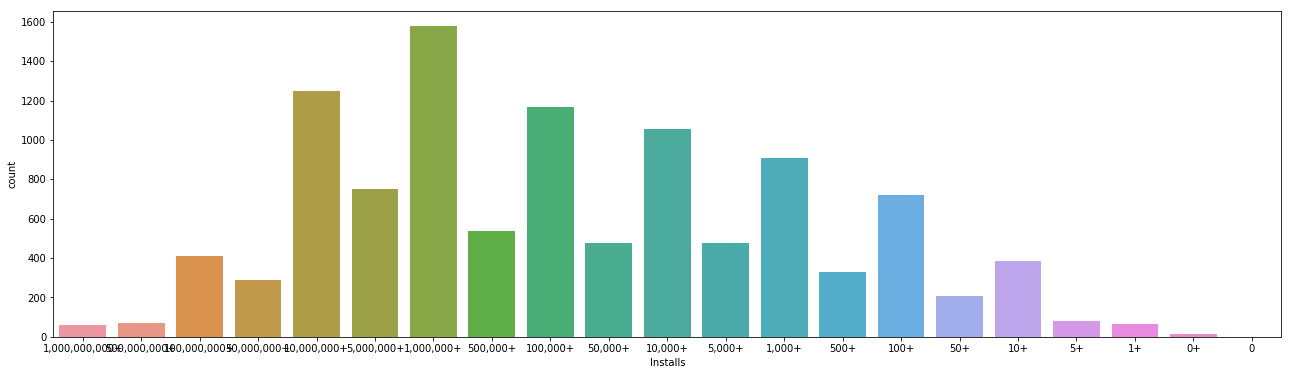

In [9]:
matplotlib.pyplot.figure(figsize=(22,6))
sns.countplot(app_dat.Installs, order=over_list, orient='v')

In [10]:
#'Free' is a rather wacky value to have here, let's look closer
free = app_dat['Installs'] == 'Free'
display(app_dat[free])
wack = app_dat['Category'] == '1.9'
display(app_dat[wack])

##turns out this value is also unique in catagories as well. clearly this data is not intact
##this is an anomoly in the dataset and should be ignored
##by shifting all entries one column this entry makes sence but we wouldn't have an accurate catagory for it

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
## removing entry
app_dat.drop(app_dat[wack].index, axis=0, inplace=True)

At this point I'll want to experiment with three different options for replacing the current values for 'Installs' and see how it affects the projection for most downloaded catagory:

* First option: set each value to the minimum possible

* Second option: set each value to the mid point between its minimum and maximum values.

* Third option: set each value to the maximum possible for the bin.

I've hidden the code cell bellow for the functions I'll use to populate the three test columns. The code is nothing impressive and has alot of lines.

In [12]:
## I could have used a dictionary and mapping function, which would have been more concise
## This perticular layout just helped me to see the gaps between values better
def installs_min(stng):
    if stng == '1,000,000,000+':
        return 1000000001
    if stng == '500,000,000+':
        return 500000001
    if stng == '100,000,000+':
        return 100000001
    if stng == '50,000,000+':
        return 50000001
    if stng == '10,000,000+':
        return 10000001
    if stng == '5,000,000+':
        return 5000001
    if stng == '1,000,000+':
        return 1000001
    if stng == '500,000+':
        return 500001
    if stng == '100,000+':
        return 100001
    if stng == '50,000+':
        return 50001
    if stng == '10,000+':
        return 10001
    if stng == '5,000+':
        return 5001
    if stng == '1,000+':
        return 1001
    if stng == '500+':
        return 501
    if stng == '100+':
        return 101
    if stng == '50+':
        return 51
    if stng == '10+':
        return 11
    if stng == '5+':
        return 6
    if stng == '1+':
        return 2
    if stng == '0+':
        return 1
    if stng == '0':
        return 0
    if stng == 'Free': ##this entry should be deleted in the final version but lets not take chances
        return 0
    
def installs_mid(stng):
    if stng == '1,000,000,000+': ##I assume 5 billion would come next, yes this is getting silly
        return 2500000000
    if stng == '500,000,000+':
        return 750000000
    if stng == '100,000,000+':
        return 250000000
    if stng == '50,000,000+':
        return 75000000
    if stng == '10,000,000+':
        return 25000000
    if stng == '5,000,000+':
        return 7500000
    if stng == '1,000,000+':
        return 2500000
    if stng == '500,000+':
        return 750000
    if stng == '100,000+':
        return 250000
    if stng == '50,000+':
        return 75000
    if stng == '10,000+':
        return 25000
    if stng == '5,000+':
        return 7500
    if stng == '1,000+':
        return 2500
    if stng == '500+':
        return 750
    if stng == '100+':
        return 250
    if stng == '50+':
        return 75
    if stng == '10+':
        return 25
    if stng == '5+':
        return 8
    if stng == '1+':
        return 3
    if stng == '0+':
        return 1
    if stng == '0':
        return 0
    if stng == 'Free':
        return 
    
def installs_max(stng):#shows max value
    if stng == '1,000,000,000+':
        return 5000000000
    if stng == '500,000,000+':
        return 1000000000
    if stng == '100,000,000+':
        return 500000000
    if stng == '50,000,000+':
        return 100000000
    if stng == '10,000,000+':
        return 50000000
    if stng == '5,000,000+':
        return 10000000
    if stng == '1,000,000+':
        return 5000000
    if stng == '500,000+':
        return 1000000
    if stng == '100,000+':
        return 500000
    if stng == '50,000+':
        return 100000
    if stng == '10,000+':
        return 50000
    if stng == '5,000+':
        return 10000
    if stng == '1,000+':
        return 5000
    if stng == '500+':
        return 1000
    if stng == '100+':
        return 500
    if stng == '50+':
        return 100
    if stng == '10+':
        return 50
    if stng == '5+':
        return 10
    if stng == '1+':
        return 5
    if stng == '0+':
        return 1
    if stng == '0':
        return 0
    if stng == 'Free': ##this entry should be deleted in the final version but lets not take chances
        return 0

In [13]:
app_dat['min_installs'] = pd.Series([installs_min(x) for x in app_dat.Installs], index=app_dat.index)
app_dat['mid_installs'] = pd.Series([installs_mid(x) for x in app_dat.Installs], index=app_dat.index)
app_dat['max_installs'] = pd.Series([installs_max(x) for x in app_dat.Installs], index=app_dat.index)
app_dat.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,min_installs,mid_installs,max_installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10001,25000,50000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500001,750000,1000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000001,7500000,10000000


In [14]:
#Now to aggrigate and sort the data
full_app = app_dat.groupby(['Category'])['max_installs', 'mid_installs', 'min_installs'].sum()
full_app = full_app.sort_values(by=['min_installs'],ascending=False)
full_app

,max_installs,mid_installs,min_installs
Category,,,
GAME,135655997395,74457019481,35086025559
COMMUNICATION,135846078975,72488089869,32647276638
PRODUCTIVITY,53410039001,29616755812,14176091793
SOCIAL,58821649882,31332106549,14069868197
TOOLS,39651506885,22761145563,11452772758
FAMILY,38465938672,21370532488,10258265476
PHOTOGRAPHY,45905603960,23708741033,10088247990
NEWS_AND_MAGAZINES,28063723721,15601506042,7496318043
TRAVEL_AND_LOCAL,32919877886,16697365253,6868887404


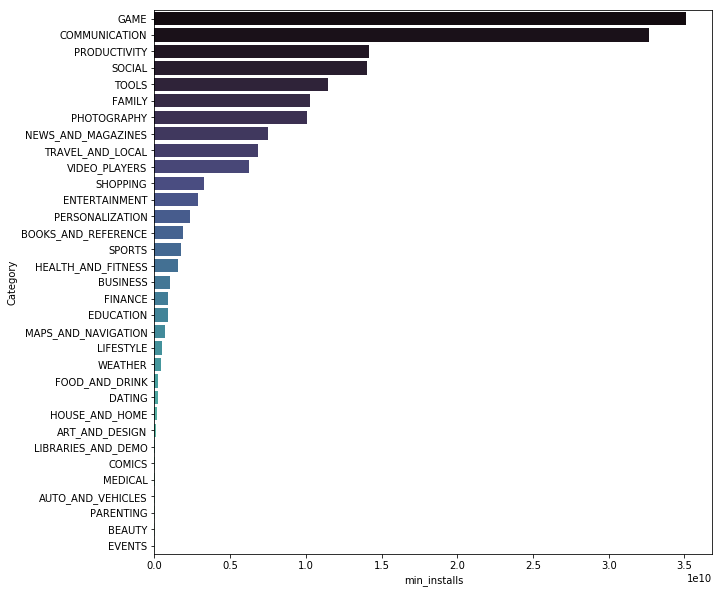

In [15]:
#mako
matplotlib.pyplot.figure(figsize=(10,10))
sns.barplot(x=full_app['min_installs'], y=full_app.index, palette='mako')

#Additional ideas: bin bottum 5% of apps

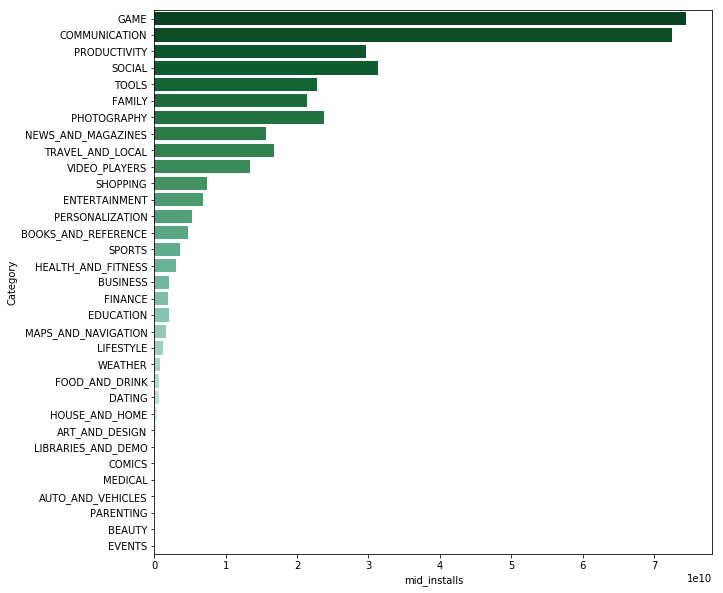

In [16]:
#full_app = full_app.sort_values(by=['mid_installs'],ascending=False)
matplotlib.pyplot.figure(figsize=(10,10))
#with sns.palplot(sns.color_palette("BuGn_r")):
sns.barplot(x=full_app['mid_installs'], y=full_app.index, palette='BuGn_r')
#sns.palplot(sns.color_palette("BuGn_r"))

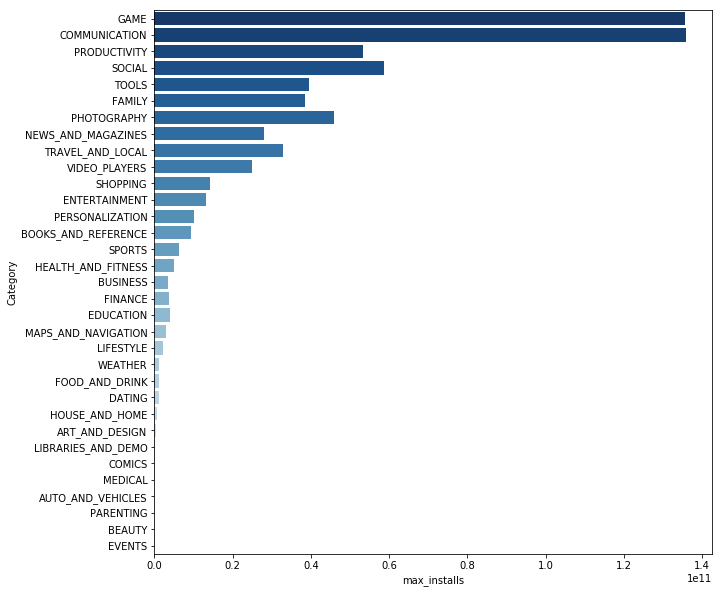

In [17]:
matplotlib.pyplot.figure(figsize=(10,10))
sns.barplot(x=full_app['max_installs'], y=full_app.index, palette='Blues_r')
#when we replace each value with the max for its bin we start seeing communication overtake games as the installed catagory

So looking above we can see that the most popular catagory is games, with communication being a close second (when viewing the middle values the difference is less than 5% and it only shifts to communication when all values are set to max). There is still some room for debate, but I'm reasonably confident in my result.

In [18]:
short_app = full_app.head(10) ##shorter list of the top entries
##one other alternative that I did not try was to group all the entries that have fewer than 5% of the installs

The code for the below graphic was highly influenced by the tutorial on the website for the seaborn library:
https://seaborn.pydata.org/examples/horizontal_barplot.html

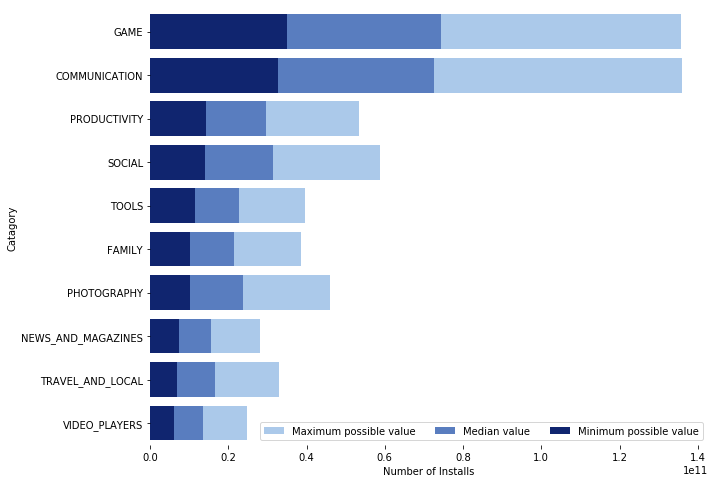

In [19]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 8))

sns.set_color_codes("pastel")
sns.barplot(x=short_app['max_installs'], y=short_app.index,
            label="Maximum possible value", color="b")

sns.set_color_codes("muted")
sns.barplot(x=short_app['mid_installs'], y=short_app.index,
            label="Median value", color="b")

sns.set_color_codes("dark")
sns.barplot(x=short_app['min_installs'], y=short_app.index,
            label="Minimum possible value", color="b")

ax.legend(ncol=3, loc="lower right", frameon=True)
ax.set( ylabel="Catagory",
       xlabel="Number of Installs")
sns.despine(left=True, bottom=True)

# Further thoughts:

* I could have removed some of the uncertainty by viewing the distrobution of the # of ratings within each bin.
* I was also curious, but ran out of time, about what the average number of installs for each catagory might be (I'm trying to do a task a week so thats were the self imposed dealine comes from).
* Finally, this time I decided to show the final graphic in the first cell and then show my work below. Was this a more optimal layout for a response to a task?

As always I'd love to hear your thoughts, ideas, and constructive criticism in the comments below. And if you liked what you see here feel free to upvote the notebook and check out my profile for links to my other notebooks.